In [1]:
'''
Measurement files: \
folder = str("../logs/20200706_15_03_03/") # error \
folder = str("../logs/20200706_15_03_14/") # linear sho 312-123 \
folder = str("../logs/20200706_15_54_06/") # linear mid 59000-23000 \
folder = str("../logs/20200706_16_13_49/") # square mid 10000-3700 \
folder = str("../logs/20200706_16_14_42/") # squrae mid 87000-34000 \
folder = str("../logs/20200706_16_22_17/") # square mid 23000-8900 amorf \
folder = str("../logs/20200707_11_46_33/") # linear sho 3500-1400 \
folder = str("../logs/20200707_12_32_33/") # error \
folder = str("../logs/20200707_12_32_38/") # error \
folder = str("../logs/20200707_12_32_41/") # error \
folder = str("../logs/20200707_12_34_38/") # error \
folder = str("../logs/20200707_13_12_55/") # error \
folder = str("../logs/20200707_13_13_09/") # linear lon 136000-54000 \
folder = str("../logs/20200707_13_25_05/") # linear lon 120000-47000 \
folder = str("../logs/20200707_13_33_27/") # linear lon 120000-46000 \
folder = str("../logs/20200707_13_41_32/") # linear lon 130000-53000 \
folder = str("../logs/20200707_14_44_12/") # infini lon 340000-134000 \
folder = str("../logs/20200707_15_07_14/") # infini lon 370000-150000 \
''';

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DataStreamPreprocessor import DataStream, Normalizer, Batcher
import matplotlib.pyplot

import tensorflow as tf
import time

In [4]:
folder = str("../logs/20200706_16_22_17/")

d = DataStream(folder)

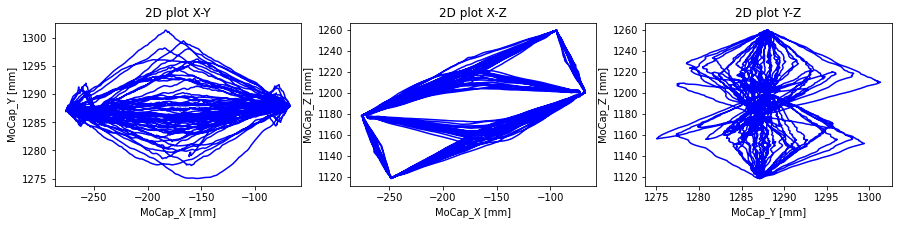

In [6]:
d.plotData(plot2D = True)

In [7]:
d.addFeature(['diff_Timestamp', 'diff_Marg_posX', 'diff_Marg_posY', 'diff_Marg_posZ','diff_Marg_rotX', 'diff_Marg_rotY', 'diff_Marg_rotZ'])

In [8]:
d.showHeader()

0 - Timestamp
1 - AccX
2 - AccY
3 - AccZ
4 - GyroX
5 - GyroY
6 - GyroZ
7 - MagX
8 - MagY
9 - MagZ
10 - Marg_posX
11 - Marg_posY
12 - Marg_posZ
13 - Marg_quatX
14 - Marg_quatY
15 - Marg_quatZ
16 - Marg_quatW
17 - Marg_rotX
18 - Marg_rotY
19 - Marg_rotZ
20 - diff_Timestamp
21 - diff_Marg_posX
22 - diff_Marg_posY
23 - diff_Marg_posZ
24 - diff_Marg_rotX
25 - diff_Marg_rotY
26 - diff_Marg_rotZ


In [10]:
data = [20,1,2,3,4,5,6,7,8,9]
label = [21,22,23,24,25,26]

in_seq_len = 32

In [11]:
# Normalization
X_alap, X_header, Y_alap, Y_header = d.dataParser(data, label, in_seq_len)

nx = Normalizer()
ny = Normalizer()

X_norm = nx.normalize(X_alap)
Y_norm = ny.normalize(Y_alap)

print(X_alap.shape)
print(X_alap.shape)

(22956, 32, 10)
(22956, 32, 10)


In [12]:
class LSTMnet(tf.keras.Model):
    def __init__(self, input_shape):
        super(LSTMnet, self).__init__()
        self.LSTM1  = tf.keras.layers.LSTM(64, activation='relu', input_shape=input_shape, return_sequences=False)
        self.Dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.Dense2 = tf.keras.layers.Dense(1, activation=None)
        
    def call(self):
        output = self.LSTM1()
        output = self.Dense1(output)
        output = self.Dense2(output)
        
        return output

In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=10e-4, beta_1=0.9,
                                     beta_2=0.98, epsilon=1e-9)

In [14]:
# Loss

In [15]:
input_shape = (X_norm.shape[1], X_norm.shape[2])
#print(input_shape)
lstm_net = LSTMnet(input_shape=input_shape)

In [16]:
epoch = 32